# 00 - femsainfancias_missingcities_metrogdf2020

This Notebook uploads to database a gdf containing the municipalities (with city col) of cities that were missing from previous proximity analysis (Since are not registered as Metropolitan Areas in Mexico) but were requested by client.

Resulting layer (femsainfancias_missingcities_metrogdf2020) to be used in the Scripts that calculate proximity analysis (version 1).

__Missing cities from proximity analysis: Ixtapa (Zihuatanejo), San Cristóbal de las Casas.__

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [17]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = True

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

## Load municipalities

### Load Ixtapa-Zihuatanejo

#### Load mun gdf

In [4]:
# Download area of interest
mun_schema = 'marco'
mun_table = 'mpos_2020'
nomgeo = 'Zihuatanejo de Azueta'

query = f"SELECT * FROM {mun_schema}.{mun_table} WHERE \"NOMGEO\" LIKE \'{nomgeo}\'"
ixtapa_gdf = aup.gdf_from_query(query, geometry_col='geometry')
ixtapa_gdf = ixtapa_gdf.set_crs("EPSG:4326")

# Show
print(ixtapa_gdf.shape)
ixtapa_gdf.head(1)

(1, 5)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,12038,12,038,Zihuatanejo de Azueta,"MULTIPOLYGON (((-101.65842 17.67894, -101.6580..."


<Axes: >

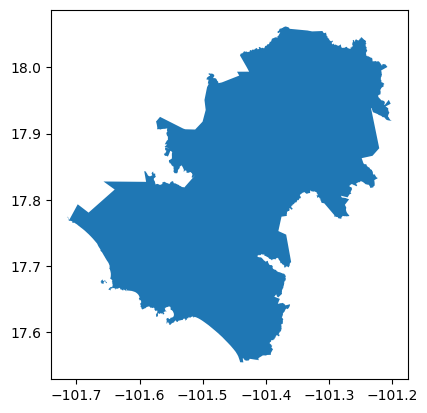

In [5]:
ixtapa_gdf.plot()

#### Add city col

In [8]:
ixtapa_gdf['city'] = 'Zihuatanejo'

# Show
print(ixtapa_gdf.shape)
ixtapa_gdf.head(1)

(1, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,12038,12,038,Zihuatanejo de Azueta,"MULTIPOLYGON (((-101.65842 17.67894, -101.6580...",Zihuatanejo


### Load San Cristobal de las Casas

In [10]:
# Download area of interest
mun_schema = 'marco'
mun_table = 'mpos_2020'
nomgeos = ['Chamula','Zinacantán','San Cristóbal de las Casas']

san_cristobal_gdf = gpd.GeoDataFrame()
for nomgeo in nomgeos:
    query = f"SELECT * FROM {mun_schema}.{mun_table} WHERE \"NOMGEO\" LIKE \'{nomgeo}\'"
    mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')
    mun_gdf = mun_gdf.set_crs("EPSG:4326")
    san_cristobal_gdf = pd.concat([san_cristobal_gdf,mun_gdf])

# Show
print(san_cristobal_gdf.shape)
san_cristobal_gdf.head(5)

(3, 5)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,07023,07,023,Chamula,"POLYGON ((-92.69055 16.89591, -92.68747 16.889..."
0,07111,07,111,Zinacantán,"POLYGON ((-92.74253 16.77523, -92.74047 16.772..."
0,07078,07,078,San Cristóbal de las Casas,"MULTIPOLYGON (((-92.34427 16.57003, -92.34587 ..."


<Axes: >

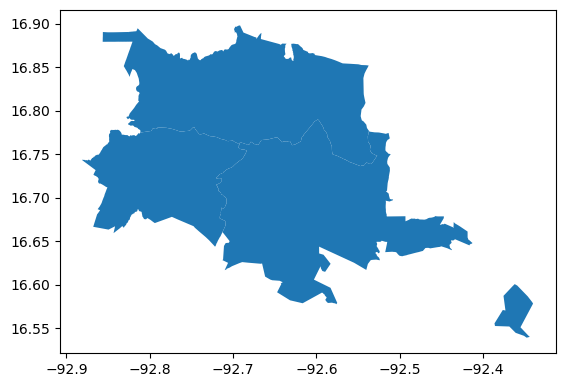

In [11]:
san_cristobal_gdf.plot()

#### Add city col

In [12]:
san_cristobal_gdf['city'] = 'San Cristobal'

# Show
print(san_cristobal_gdf.shape)
san_cristobal_gdf.head(1)

(3, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,07023,07,023,Chamula,"POLYGON ((-92.69055 16.89591, -92.68747 16.889...",San Cristobal


## Create metro gdf for these cities

In [15]:
metro_gdf = pd.concat([ixtapa_gdf,san_cristobal_gdf])
metro_gdf = metro_gdf[['CVEGEO','CVE_ENT','CVE_MUN','NOMGEO','city','geometry']]

# Show
print(metro_gdf.crs)
print(metro_gdf.shape)
metro_gdf.head(5)

EPSG:4326
(4, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,city,geometry
0,12038,12,038,Zihuatanejo de Azueta,Zihuatanejo,"MULTIPOLYGON (((-101.65842 17.67894, -101.6580..."
0,07023,07,023,Chamula,San Cristobal,"POLYGON ((-92.69055 16.89591, -92.68747 16.889..."
0,07111,07,111,Zinacantán,San Cristobal,"POLYGON ((-92.74253 16.77523, -92.74047 16.772..."
0,07078,07,078,San Cristóbal de las Casas,San Cristobal,"MULTIPOLYGON (((-92.34427 16.57003, -92.34587 ..."


## Save to database

In [18]:
save_schema = 'projects_research'
save_table = 'femsainfancias_missingcities_metrogdf2020'

if save:
    aup.gdf_to_db_slow(metro_gdf, save_table, save_schema, if_exists='append')